# Resizing an image with a Keras Layer


> Mirror facing mirror - nowhere else.
>
> – Ikkyu

In this short tutorial we will discuss one way of resizing an image with the use of a Tensorflow Keras Layer. Would we recommend to use Tensorflow to achieve this single purpose? No. Yet please bear in mind, these early posts are meant to learn the building blocks for fancy models later on ... 

Enjoy



## Getting ready

In [10]:

import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from IPython import display

image_path = './images/fujiyama.png'



## Preprocessing the image

1. Loading the image file into PIL format:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

2. Converting the PIL Image instance to a Numpy array:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array

3. Determining the height and width of the image.

4. Converting the single image into a batch. (Keras layers are expecting a batch as input.)


In [11]:
image_pil = tf.keras.preprocessing.image.load_img(image_path) #(1)

image_np_array = tf.keras.preprocessing.image.img_to_array(image_pil) #(2)
print("Image numpy array shape: {}".format(image_np_array.shape))

height,width,_ = image_np_array.shape #(3)

image_np_array_batch = np.array([image_np_array]) #(4)

Image numpy array shape: (1024, 1536, 3)


## The original image

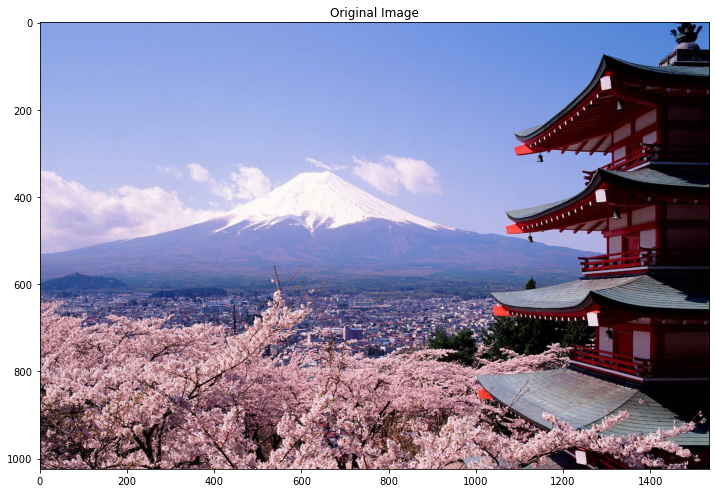


Image height/width: 1024/1536



In [25]:
plt.figure(figsize=(12,12))

plt.title('Original Image')
plt.imshow(image_np_array/255.0)

plt.show()

print("\nImage height/width: {}/{}\n".format(height,width))


## Resizing the image

1) Creating an Image resizing layer for given target height & width with Keras   
https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Resizing

2) Resizing the image


In [13]:
height_resized = height // 2
width_resized = width // 2

print("Desired target image height/width: {}/{}".format(height_resized,width_resized))

resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(height_resized,width_resized,interpolation='bilinear') #(1)

image_resized_np_array_batch = resize_layer(image_np_array_batch) #(2)

print("Keras Resizing Layer output shape (Numpy Array): {}".format(image_resized_np_array_batch.shape))


Desired output image height/width: 512/768
Keras Resizing Layer output shape (Numpy Array): (1, 512, 768, 3)


## The glorious result


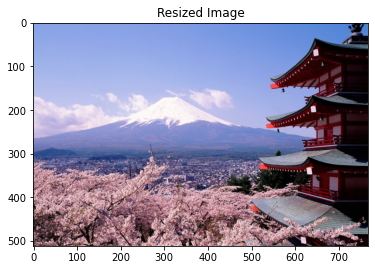


Resized image height/width: 512/768



In [26]:
image_resized_np_array = image_resized_np_array_batch[0]

height_resized,width_resized,_ = image_resized_np_array.shape


plt.figure(figsize=(6,6))
plt.title('Resized Image')
plt.imshow(image_resized_np_array/255.0)
plt.show()

print("\nResized image height/width: {}/{}\n".format(height_resized,width_resized))
